In [ ]:
import pandas as pd

from pathlib import Path

In [ ]:
# Import training dataset
dataset = Path('../dataset')

df = pd.read_csv(dataset/"accidents_train.csv")

df.head()

,Num,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,1,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,2,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,3,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,5,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
target = 'Accident_severity'
my_list = df.columns.tolist()
set2 = my_list[11:21]
set2.append(target)
print(len(set2),set2)

11 ['Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Accident_severity']


In [ ]:
#Initial Inspection
print(df1.isnull().sum())

print(df1.info())

print(df1.describe(include='object'))

Defect_of_vehicle          2985
Area_accident_occured       160
Lanes_or_Medians            267
Road_allignment             102
Types_of_Junction             0
Road_surface_type           115
Road_surface_conditions       0
Light_conditions              0
Weather_conditions            0
Type_of_collision           100
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8210 entries, 0 to 8209
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Defect_of_vehicle        5225 non-null   object
 1   Area_accident_occured    8050 non-null   object
 2   Lanes_or_Medians         7943 non-null   object
 3   Road_allignment          8108 non-null   object
 4   Types_of_Junction        8210 non-null   object
 5   Road_surface_type        8095 non-null   object
 6   Road_surface_conditions  8210 non-null   object
 7   Light_conditions         8210 non-null   object
 8   Weather_conditions       

In [ ]:
%run /content/jc-functions.ipynb

In [ ]:
#Define categorical features
categorical_features = ['Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision']

In [ ]:
#Data quality report
data_quality_report_cat(df1, categorical_features)

Data Quality Report for Categorical Features
Stats
-----
                   Feature  Count  Missing  % Missing  Cardinality
0        Defect_of_vehicle   5225     2985      57.13            4
1    Area_accident_occured   8050      160       1.99           15
2         Lanes_or_Medians   7943      267       3.36            8
3          Road_allignment   8108      102       1.26           10
4        Types_of_Junction   8210        0       0.00            8
5        Road_surface_type   8095      115       1.42            6
6  Road_surface_conditions   8210        0       0.00            4
7         Light_conditions   8210        0       0.00            4
8       Weather_conditions   8210        0       0.00            9
9        Type_of_collision   8110      100       1.23           11


Mode 1
------
                   Feature                                            Mode 1  \
0        Defect_of_vehicle                                         No defect   
1    Area_accident_occured    

Cleaning the data

In [ ]:
#Data cleaning
for col in df1.columns:
    df1[col] = df1[col].fillna(df1[col].mode()[0])

<ipython-input-40-c7bea55e39b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].fillna(df1[col].mode()[0])


In [ ]:
#Double-check clean data
data_quality_report_cat(df1, categorical_features)

Data Quality Report for Categorical Features
Stats
-----
                   Feature  Count  Missing  % Missing  Cardinality
0        Defect_of_vehicle   8210        0        0.0            3
1    Area_accident_occured   8210        0        0.0           14
2         Lanes_or_Medians   8210        0        0.0            7
3          Road_allignment   8210        0        0.0            9
4        Types_of_Junction   8210        0        0.0            8
5        Road_surface_type   8210        0        0.0            5
6  Road_surface_conditions   8210        0        0.0            4
7         Light_conditions   8210        0        0.0            4
8       Weather_conditions   8210        0        0.0            9
9        Type_of_collision   8210        0        0.0           10


Mode 1
------
                   Feature                                            Mode 1  \
0        Defect_of_vehicle                                         No defect   
1    Area_accident_occured    

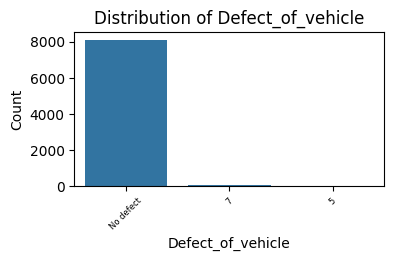

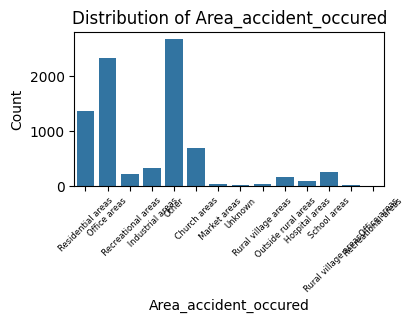

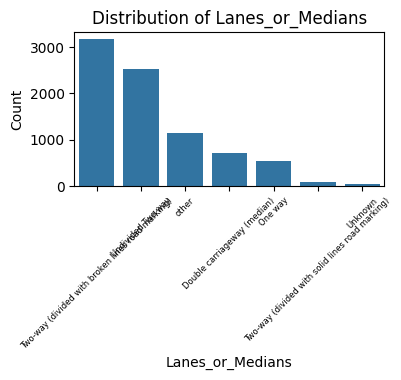

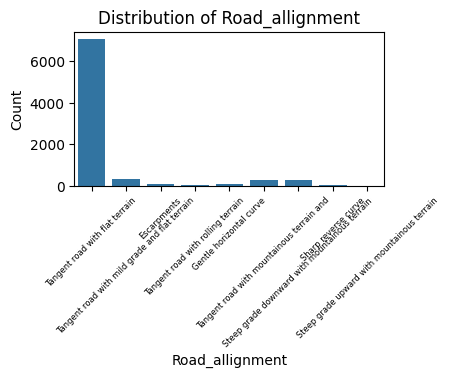

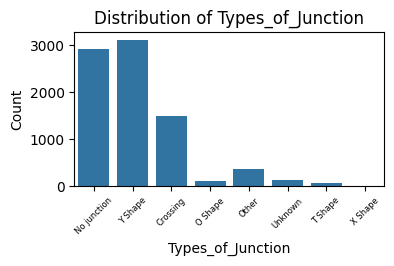

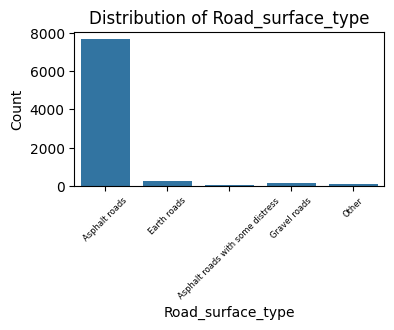

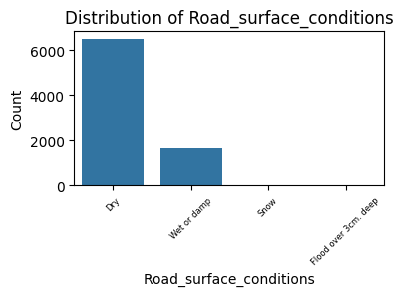

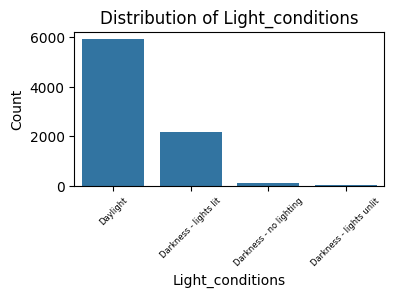

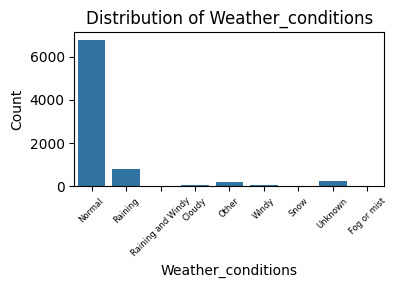

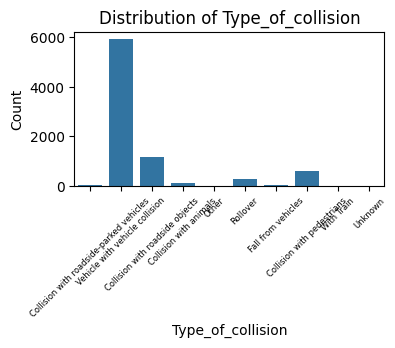

In [ ]:
#Visualize distributions
for feature in categorical_features:
    plt.figure(figsize=(4, 2))
    sns.countplot(data=df1, x=feature)
    plt.title('Distribution of ' + feature)
    plt.xlabel(feature)
    plt.xticks(rotation=45, fontsize=6)
    plt.ylabel('Count')
    plt.show()

In [ ]:
#Define function to perform chi-square test
def perform_chi2_test(df, feature1, target):
    contingency_table = pd.crosstab(df[feature1], df[target])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    return chi2, p_value

In [ ]:
chi_square_results = []
chi_square_values = []
p_values = []

In [ ]:
#Perform chi-squared test
for column in categorical_features:
    chi2, p_value = perform_chi2_test(df, column, 'Accident_severity')
    chi_square_results.append((column, chi2, p_value))
    chi_square_values.append(chi2)
    p_values.append(p_value)
    print(f"Chi-squared test for {column}:")
    print(f"Chi-squared value: {chi2}")
    print(f"P-value: {p_value}")
    print(f"Degrees of Freedom: {dof:.02f}\n")


Chi-squared test for Defect_of_vehicle:
Chi-squared value: 1.815558107965728
P-value: 0.7696347037158582
Degrees of Freedom: 4.00

Chi-squared test for Area_accident_occured:
Chi-squared value: 45.60537733466555
P-value: 0.010093215397474282
Degrees of Freedom: 4.00

Chi-squared test for Lanes_or_Medians:
Chi-squared value: 10.46542304855572
P-value: 0.5751993036180403
Degrees of Freedom: 4.00

Chi-squared test for Road_allignment:
Chi-squared value: 16.91403666623602
P-value: 0.39118073901723627
Degrees of Freedom: 4.00

Chi-squared test for Types_of_Junction:
Chi-squared value: 41.002640045213184
P-value: 0.0001777029383432938
Degrees of Freedom: 4.00

Chi-squared test for Road_surface_type:
Chi-squared value: 7.878070949618699
P-value: 0.4454703827962947
Degrees of Freedom: 4.00

Chi-squared test for Road_surface_conditions:
Chi-squared value: 0.963243628552523
P-value: 0.9869673605112773
Degrees of Freedom: 4.00

Chi-squared test for Light_conditions:
Chi-squared value: 37.93624425

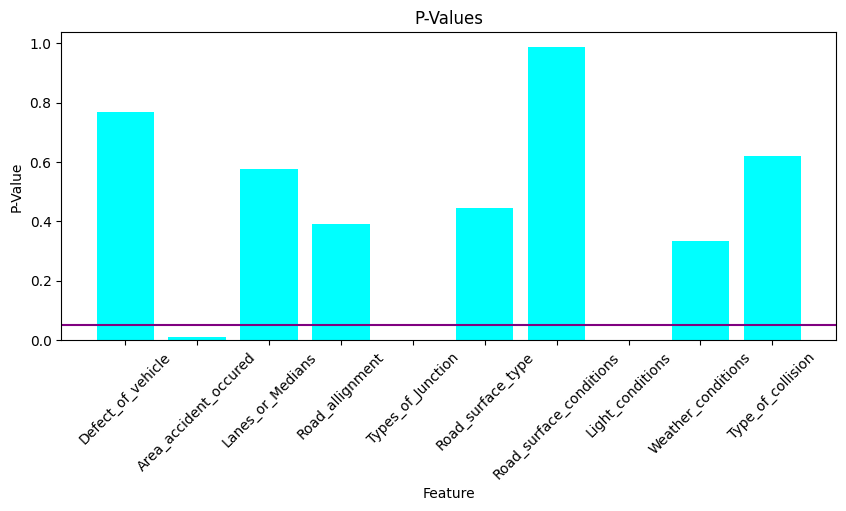

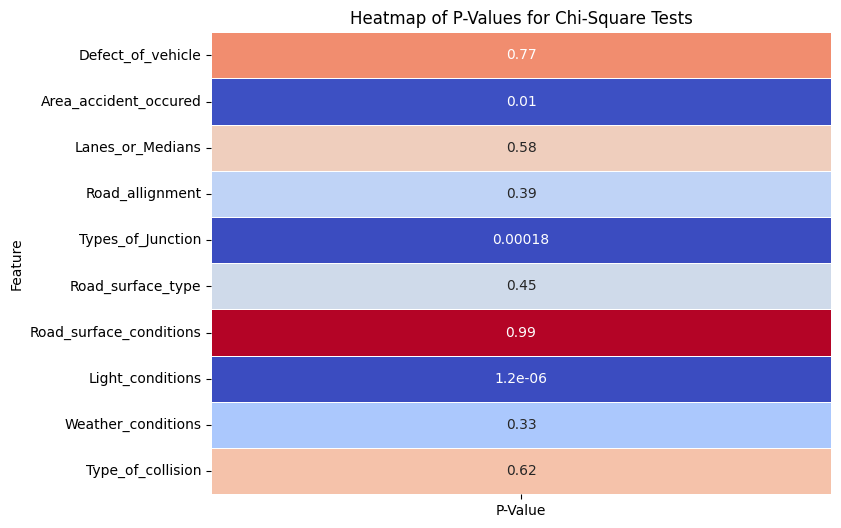

In [ ]:
# Visualize P-Values
plt.figure(figsize=(10, 4))
plt.bar(categorical_features, p_values, color='cyan')
#Significance level:
plt.axhline(0.05, color='purple')
plt.title('P-Values')
plt.xlabel('Feature')
plt.ylabel('P-Value')
plt.xticks(rotation=45)
plt.show()

# Heatmap for P-Values
p_values_df = pd.DataFrame({'Feature': categorical_features, 'P-Value': p_values})
p_values_df.set_index('Feature', inplace=True)

plt.figure(figsize=(8, 6))
sns.heatmap(p_values_df, annot=True, cmap='coolwarm', cbar=False, linewidths=0.5)
plt.title('Heatmap of P-Values for Chi-Square Tests')
plt.show()